In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/marco-andres/Documents/Data Science/Courses/NLP Career Path - Codecademy/Portfolio Projects/Biodiversity in National Parks':
  os.chdir(r'/Users/marco-andres/Documents/Data Science/Courses/NLP Career Path - Codecademy/Portfolio Projects/Biodiversity in National Parks')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/vd/1tcnpx3n25j4m4gs2vfxctdm0000gn/T/ipykernel_19947/2585508801.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/importlib/_bootstrap.py": 1654533577.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/importlib/_bootstrap_external.py": 1654533577.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/codecs.py": 1654533576.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/encodings/aliases.py": 1654533576.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/encodings/__init__.py": 1654533576.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/encodings/utf_8.py": 1654533577.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/abc.py": 1654533576.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/io.py": 1654533576.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/stat.py": 1654533576.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/_collections_abc.py": 1654533576.0,

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [3]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [4]:
display(species.sample(5))

,category,scientific_name,common_names,conservation_status
2267,Vascular Plant,Panicum gattingeri,"Gattinger Panic Grass, Panic Grass",NaN
4255,Vascular Plant,Panicum capillare,"Annual Witchgrass, Common Panic Grass, Common ...",NaN
2800,Nonvascular Plant,Hygrohypnum ochraceum,Hygrohypnum Moss,NaN
5674,Vascular Plant,Eschscholzia hypecoides,San Benito Poppy,NaN
3422,Vascular Plant,Balsamorhiza sagittata,Arrowleaf Balsamroot,NaN


In [5]:
display(observations.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


None

'\n'

In [6]:
observations.sample(5)

,scientific_name,park_name,observations
5452,Podiceps grisegena,Great Smoky Mountains National Park,70
1472,Hydrophyllum virginianum var. atranthum,Bryce National Park,106
21982,Parthenium integrifolium,Yellowstone National Park,252
6385,Brachydontium trichodes,Bryce National Park,149
8250,Gavia stellata,Yosemite National Park,163


In [7]:
def column_eda(dataset):
    cols = list(dataset.columns)
    for col in cols:
        print(f'---------------{col}---------------')
        print(f'Unique values:', dataset[col].nunique(), '\t', 
                f'Non-null values: {dataset[col].notnull().sum()}',
                '\n'f'Missing values: {dataset[col].isnull().sum()}')
        print(dataset[col].value_counts().reset_index().head(4))

column_eda(species)

---------------category---------------
Unique values: 7 	 Non-null values: 5824 
Missing values: 0
            category  count
0     Vascular Plant   4470
1               Bird    521
2  Nonvascular Plant    333
3             Mammal    214
---------------scientific_name---------------
Unique values: 5541 	 Non-null values: 5824 
Missing values: 0
        scientific_name  count
0     Castor canadensis      3
1           Canis lupus      3
2  Hypochaeris radicata      3
3         Columba livia      3
---------------common_names---------------
Unique values: 5504 	 Non-null values: 5824 
Missing values: 0
         common_names  count
0  Brachythecium Moss      7
1       Dicranum Moss      7
2         Panic Grass      6
3          Bryum Moss      6
---------------conservation_status---------------
Unique values: 4 	 Non-null values: 191 
Missing values: 5633
  conservation_status  count
0  Species of Concern    161
1          Endangered     16
2          Threatened     10
3         In Recov

In [8]:
print('Types of conservation status:', list(species.conservation_status.unique()), '\n')

species.conservation_status = species.conservation_status.fillna('No intervention')

print('New types of conservation status:', list(species.conservation_status.unique()))

Types of conservation status: [nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery'] 

New types of conservation status: ['No intervention', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']


In [9]:
duplicates = species[species.duplicated()]
print(f'Overall duplicates (rows): {len(duplicates)}', '\n')

repeated_scientific_names = species.scientific_name[species.scientific_name.duplicated()]
print(f'Duplicated scientific names: {len(repeated_scientific_names)}', '\n')

repeated_common_names = species.common_names[species.common_names.duplicated()]
print(f'Duplicated common names: {len(repeated_common_names)}', '\n')

Overall duplicates (rows): 0 

Duplicated scientific names: 283 

Duplicated common names: 320 



In [10]:
common_name_dupl_count = species.pivot_table(columns=['common_names'], aggfunc='size')\
                                .sort_values(ascending=False).reset_index()
common_name_dupl_count.columns = ['Common_Names', 'Duplicate_Count']
print('----Common Name duplicate count----\n', common_name_dupl_count.head(), '\n'\
    f'Total duplicated: {len(common_name_dupl_count[common_name_dupl_count.Duplicate_Count > 1])}', '\n'
    )

Brachythecium_Moss_rep = species.loc[species['common_names'] == 'Brachythecium Moss', 
                                    ['common_names', 'scientific_name']
                                    ]
print('----Example of repeated common name: Brachythecium Moss----\n', Brachythecium_Moss_rep)

----Common Name duplicate count----
          Common_Names  Duplicate_Count
0  Brachythecium Moss                7
1       Dicranum Moss                7
2         Panic Grass                6
3            Sphagnum                6
4          Bryum Moss                6 
Total duplicated: 248 

----Example of repeated common name: Brachythecium Moss----
             common_names           scientific_name
2812  Brachythecium Moss   Brachythecium digastrum
2813  Brachythecium Moss  Brachythecium oedipodium
2814  Brachythecium Moss   Brachythecium oxycladon
2815  Brachythecium Moss    Brachythecium plumosum
2816  Brachythecium Moss    Brachythecium rivulare
2817  Brachythecium Moss   Brachythecium rutabulum
2818  Brachythecium Moss  Brachythecium salebrosum


In [11]:
dupl_sci_names = species[species.scientific_name.duplicated(False)]
print('-------Sample of duplicated scientific names-------')
display(dupl_sci_names.head())

dupl_elk = dupl_sci_names[dupl_sci_names.scientific_name == 'Cervus elaphus']
print('-------Duplicated \'Cervus elaphus\'-------')
display(dupl_elk)

dupl_canis = dupl_sci_names[dupl_sci_names.scientific_name == 'Canis lupus']
print('-------Duplicated \'Canis lupus\'-------')
display(dupl_canis)

dupl_deer = dupl_sci_names[dupl_sci_names.scientific_name == 'Odocoileus virginianus']
print('-------Duplicated \'Odocoileus virginianus\'-------')
display(dupl_deer)

-------Sample of duplicated scientific names-------


,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,No intervention
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No intervention
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No intervention
8,Mammal,Canis lupus,Gray Wolf,Endangered
10,Mammal,Urocyon cinereoargenteus,"Common Gray Fox, Gray Fox",No intervention


-------Duplicated 'Cervus elaphus'-------


,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,No intervention
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,No intervention


-------Duplicated 'Canis lupus'-------


,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


-------Duplicated 'Odocoileus virginianus'-------


,category,scientific_name,common_names,conservation_status
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No intervention
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",No intervention


In [12]:
# Drop rows with duplicated scientific names
species = species.drop_duplicates(subset = ['scientific_name'], keep= 'first')

repeated_scientific_names = species.scientific_name[species.scientific_name.duplicated()]
print(f'Duplicated scientific names: {len(repeated_scientific_names)}', '\n')

print('-------Previously duplicated examples (now clean)-------')
display(species[species.scientific_name.isin(['Cervus elaphus', 'Canis lupus', 'Odocoileus virginianus'])])

Duplicated scientific names: 0 

-------Previously duplicated examples (now clean)-------


,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,No intervention
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No intervention
8,Mammal,Canis lupus,Gray Wolf,Endangered


In [13]:
column_eda(observations)

---------------scientific_name---------------


Unique values: 5541 	 Non-null values: 23296 
Missing values: 0
        scientific_name  count
0      Myotis lucifugus     12
1         Puma concolor     12
2  Hypochaeris radicata     12
3        Holcus lanatus     12
---------------park_name---------------
Unique values: 4 	 Non-null values: 23296 
Missing values: 0
                             park_name  count
0  Great Smoky Mountains National Park   5824
1               Yosemite National Park   5824
2                  Bryce National Park   5824
3            Yellowstone National Park   5824
---------------observations---------------
Unique values: 304 	 Non-null values: 23296 
Missing values: 0
   observations  count
0            84    220
1            85    210
2            91    206
3            92    203


count    23296.000000
mean       142.287904
std         69.890532
min          9.000000
25%         86.000000
50%        124.000000
75%        195.000000
max        321.000000
Name: observations, dtype: float64


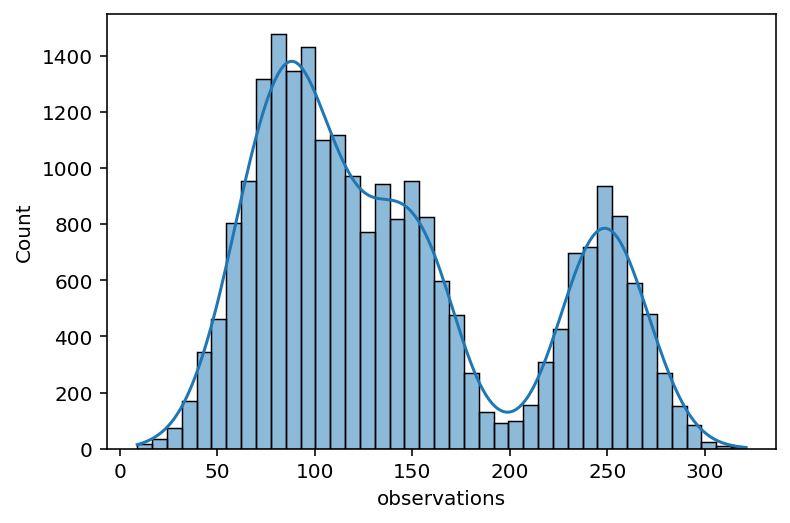

Total number of observations: 3314739 in the past 7 days.


In [14]:
print(observations.observations.describe())

sns.histplot(x = 'observations', data = observations, kde=True)
plt.show()

print('Total number of observations:', observations.observations.sum(), 'in the past 7 days.')

Total species under protection: 178
Total species not under protection: 5363


'Absolute frequencies'

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,0.0,0.0,1.0
In Recovery,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,0.0,3.0,2.0,0.0,0.0,2.0


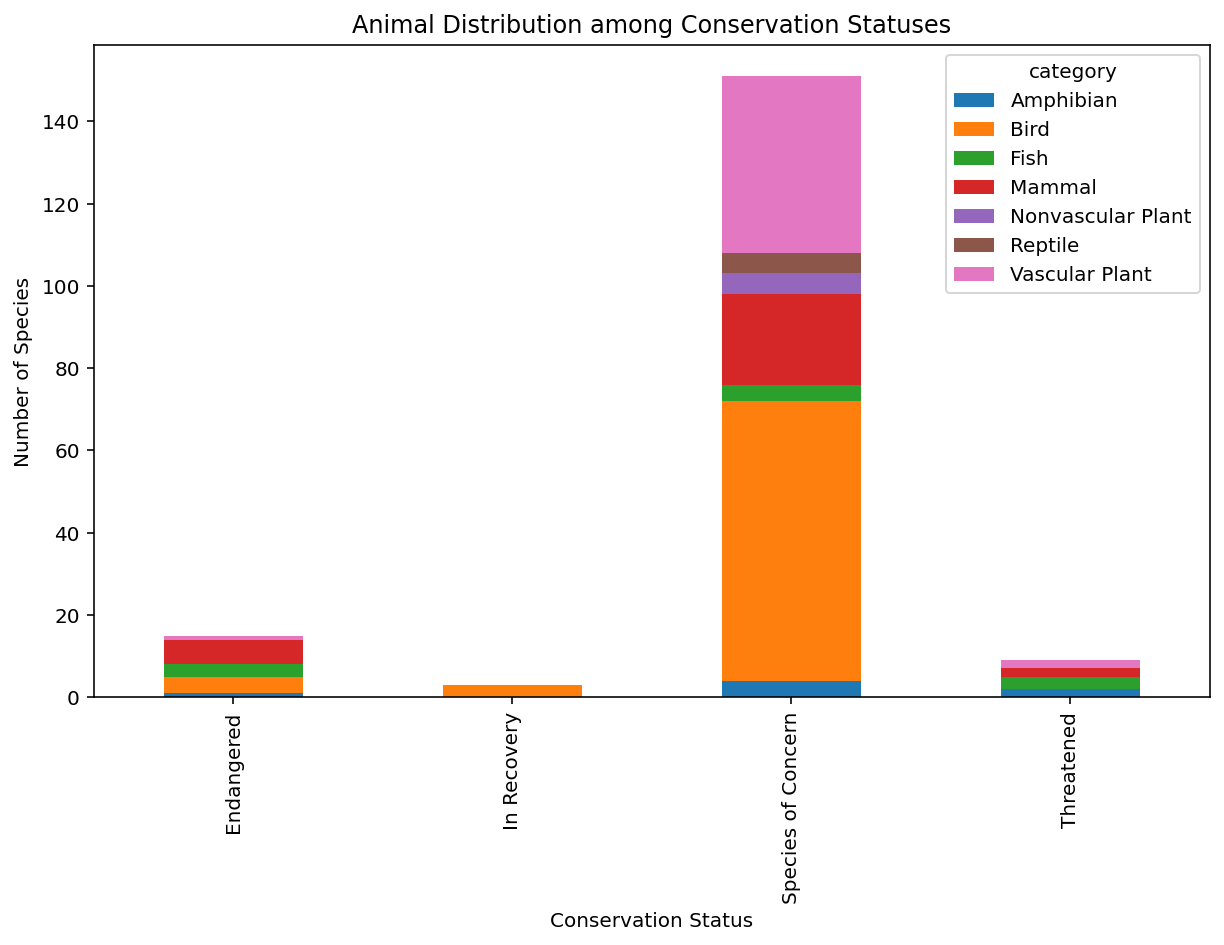

<Figure size 432x288 with 0 Axes>

In [15]:
num_conservation = len(species[species.conservation_status != 'No intervention'])
num_not_conservation = len(species[species.conservation_status == 'No intervention'])

print(f'Total species under protection: {num_conservation}')
print(f'Total species not under protection: {num_not_conservation}')

category_conservation = species[species.conservation_status != 'No intervention']\
                        .groupby(['conservation_status', 'category'])['scientific_name']\
                        .count()\
                        .unstack()\
                        .replace('nan', np.nan).fillna(0)

display("Absolute frequencies", category_conservation)

ax = category_conservation.plot(kind='bar', figsize=(10,6), stacked = True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
plt.title("Animal Distribution among Conservation Statuses")
plt.show()
plt.clf()

In [16]:
category_conservation_rel = species[species.conservation_status != 'No intervention']\
                            .groupby(['category', 'conservation_status'])['scientific_name']\
                            .count()\
                            .unstack()\
                            .replace('nan', np.nan).fillna(0)\
                            .apply(lambda x:  (100*x / x.sum()).round(2))\
                            .transpose()
display("Relative frequencies by category", category_conservation_rel)

'Relative frequencies by category'

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,6.67,26.67,20.00,40.00,0.00,0.00,6.67
In Recovery,0.00,100.00,0.00,0.00,0.00,0.00,0.00
Species of Concern,2.65,45.03,2.65,14.57,3.31,3.31,28.48
Threatened,22.22,0.00,33.33,22.22,0.00,0.00,22.22


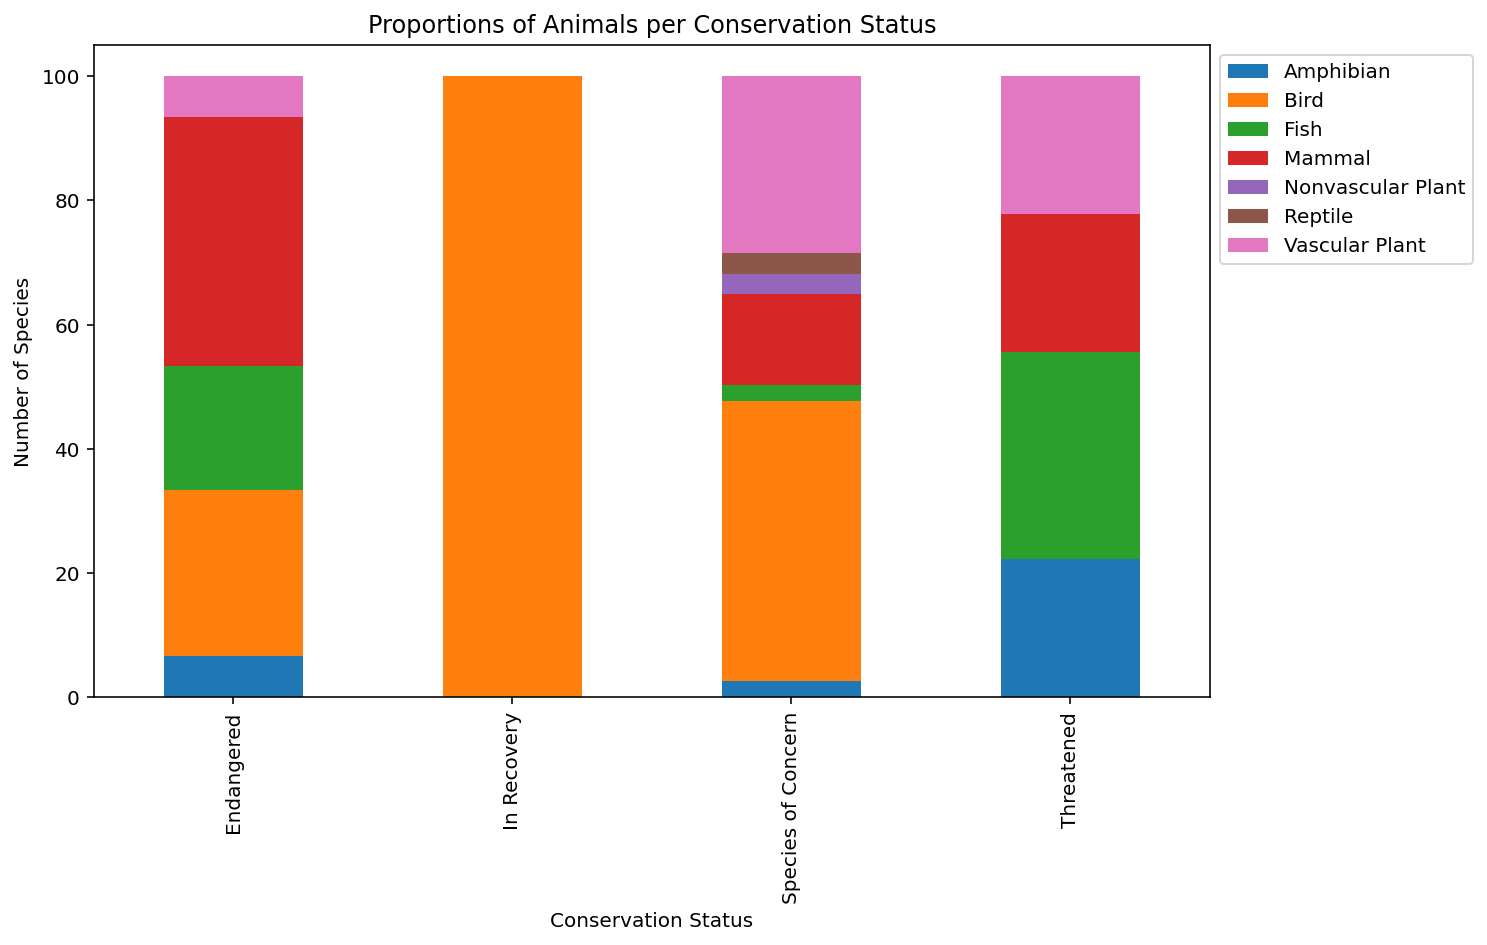

<Figure size 432x288 with 0 Axes>

In [17]:
axrel = category_conservation_rel.plot(kind='bar', figsize=(10,6), stacked = True)
axrel.set_xlabel('Conservation Status')
axrel.set_ylabel('Number of Species')
axrel.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.title("Proportions of Animals per Conservation Status")
plt.show()
plt.clf()

In [18]:
species['protected'] = species.conservation_status != 'No intervention'

category_protections = species.groupby(['category', 'protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot_table(columns = 'protected',
                                    index = 'category',
                                    values = 'scientific_name')\
                        .reset_index()
category_protections.columns = ['category', 'not_protected', 'protected']

category_protections['percentage_protected'] = (category_protections.protected / \
                                                (category_protections.protected + category_protections.not_protected) * 100)\
                                                .round(2)
display(category_protections)

,category,not_protected,protected,percentage_protected
0,Amphibian,72.0,7.0,8.86
1,Bird,413.0,75.0,15.37
2,Fish,115.0,10.0,8.00
3,Mammal,146.0,30.0,17.05
4,Nonvascular Plant,328.0,5.0,1.50
5,Reptile,73.0,5.0,6.41
6,Vascular Plant,4216.0,46.0,1.08


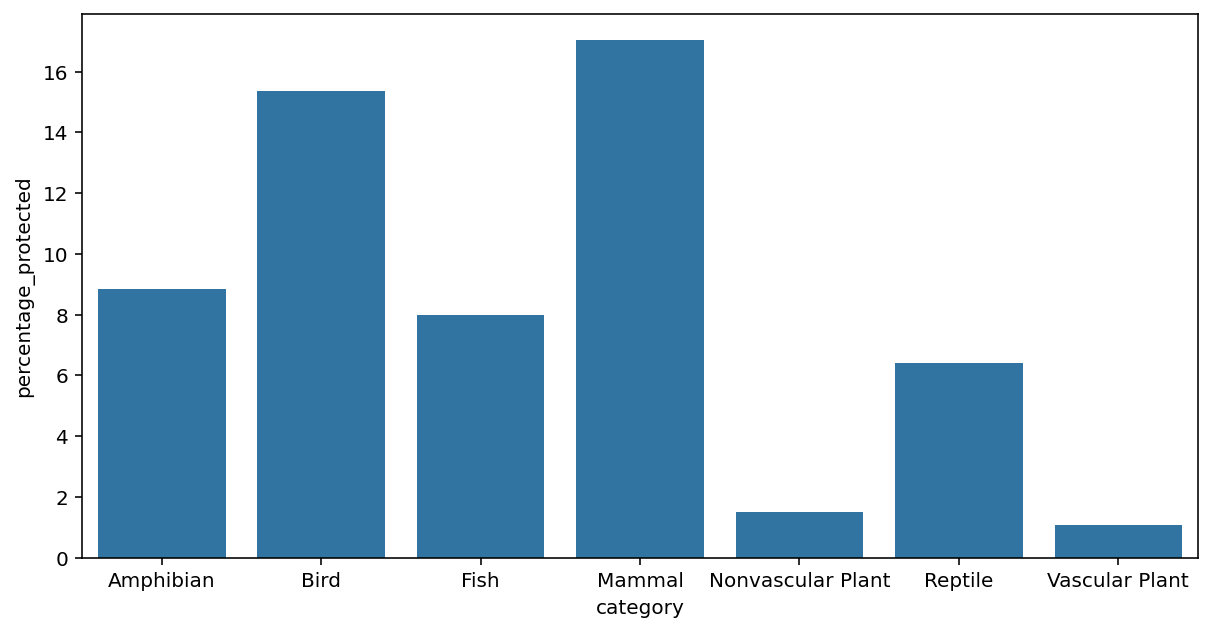

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data = category_protections, y = 'percentage_protected', x = 'category')
plt.show()
plt.clf()

,Animal Pair,p-value
0,Bird,68.76
2,Amphibian,12.76
1,Reptile,3.84
3,Fish,3.52
4,Vascular Plant,0.00
5,Nonvascular Plant,0.00


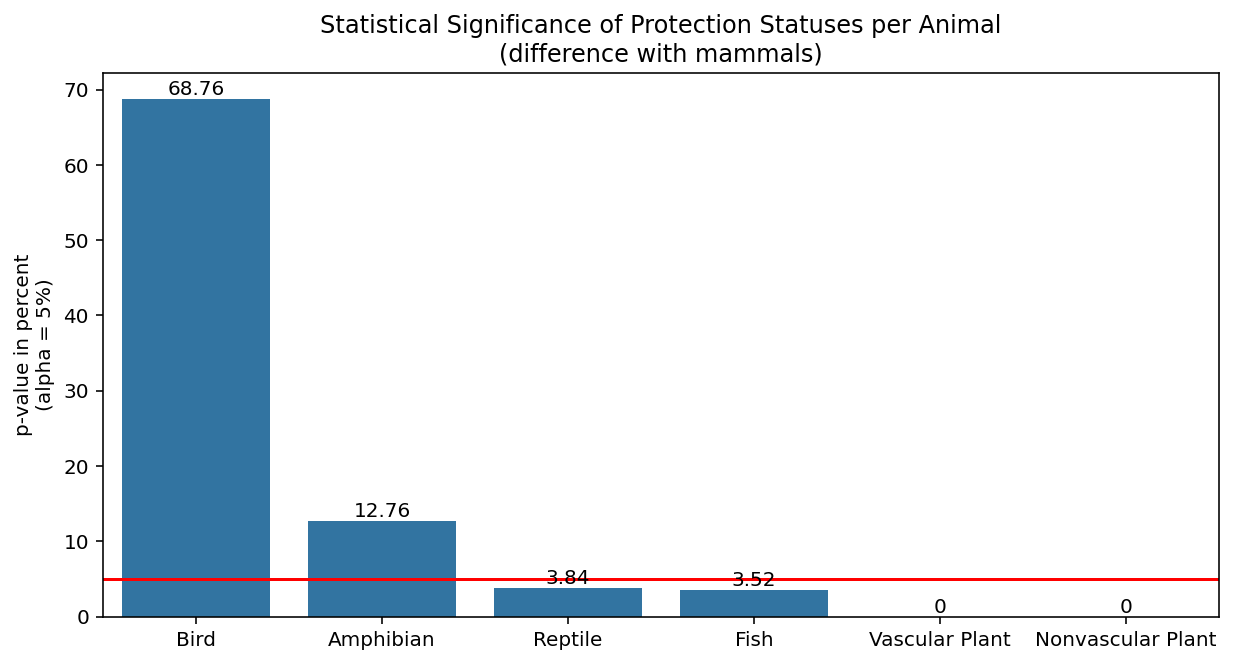

In [20]:
from scipy.stats import chi2_contingency

# Permutations
categories = list(species.category.unique())
combinations_mammal = [['Mammal', i] for i in categories][1:]
category_protections_part = category_protections.iloc[:, 0:3]
category_protections_part = category_protections_part.set_index('category')

# Significant Differences Data
sign_data = {'Animal Pair': [], 'p-value': []}
for pair in combinations_mammal:
    contingency_table = pd.DataFrame({pair[0]: category_protections_part.loc[pair[0]],
                                    pair[1]: category_protections_part.loc[pair[1]]}) 
    chi2, pval, dof, expected = chi2_contingency(contingency_table)
    sign_data['Animal Pair'].append(pair[1])
    sign_data['p-value'].append((pval*100).round(2))
sign_data = pd.DataFrame(data = sign_data).sort_values('p-value', ascending=False)
display(sign_data)

# Plot
plt.subplots(figsize=(10,5))
ax =sns.barplot(data = sign_data, x = 'Animal Pair', y = 'p-value')
plt.title('Statistical Significance of Protection Statuses per Animal\n(difference with mammals)')
plt.axhline(5, color='red')
ax.set_xlabel("")
ax.set_ylabel('p-value in percent\n(alpha = 5%)')
# plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

In [21]:
merged_df = observations.merge(species[['category', 'scientific_name', 'common_names']], how='left')
merged_df = merged_df.drop_duplicates()

merged_df_grouped = merged_df.groupby(['park_name', 'scientific_name', 'common_names', 'category']).observations\
                        .sum().sort_values(ascending=False)\
                        .reset_index()
display(merged_df_grouped.head())

,park_name,scientific_name,common_names,category,observations
0,Yellowstone National Park,Holcus lanatus,"Common Velvet Grass, Velvetgrass",Vascular Plant,805
1,Yellowstone National Park,Puma concolor,Panther (Mountain Lion),Mammal,753
2,Yellowstone National Park,Procyon lotor,"Common Raccoon, Raccoon",Mammal,745
3,Yellowstone National Park,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear",Vascular Plant,726
4,Yellowstone National Park,Columba livia,Rock Dove,Bird,722


In [22]:
merged_df_grouped_max = merged_df_grouped.loc[merged_df_grouped\
                                                    .groupby(['park_name'])\
                                                    ['observations'].idxmax()]\
                                                .sort_values(by = 'observations', ascending=False)
display(merged_df_grouped_max)

,park_name,scientific_name,common_names,category,observations
0,Yellowstone National Park,Holcus lanatus,"Common Velvet Grass, Velvetgrass",Vascular Plant,805
112,Yosemite National Park,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear",Vascular Plant,505
298,Bryce National Park,Columba livia,Rock Dove,Bird,339
2402,Great Smoky Mountains National Park,Streptopelia decaocto,Eurasian Collared-Dove,Bird,256
